In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


In [3]:
queue = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [4]:
# Load optimal lambda dict
with open('L1c_k3_opt_lmbd.json') as f:
    opt_lmbd_dict = json.load(f)
opt_lmbd_dict

{'B': 0.003162277660168382,
 'CD4_T': 0.0014677992676220694,
 'CD8_T': 0.006812920690579613,
 'DC': 0.0010000000000000002,
 'Mono': 0.003162277660168382,
 'NK': 0.006812920690579613,
 'other': 0.014677992676220709,
 'other_T': 0.00046415888336127795}

In [5]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/tuning_result_cuda')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/tuning_result_cuda')

loss_dict = {}
for celltype in queue:
    tuning_file = f'{celltype}_tuning.json'
    if not os.path.exists(tuning_file):
        print(f"File {tuning_file} does not exist. Skipping to the next cluster.")

    print('====================')
    print(f'Cell type: {celltype}')
    with open(tuning_file) as f:
        tuning = json.load(f)
    tuning = {key: np.array(value) for key, value in tuning.items()}

    loss_dict[celltype] = tuning['loss_history']

Cell type: B
Cell type: CD4_T
Cell type: CD8_T
Cell type: DC
Cell type: Mono
Cell type: NK
Cell type: other
Cell type: other_T


## Plot summary loss vs. lambda

In [6]:
log_lambda_range = tuning['log_lambda_range']
lambda_range = np.exp(log_lambda_range)
lambda_range

array([1.00000000e-05, 1.46779927e-05, 2.15443469e-05, 3.16227766e-05,
       4.64158883e-05, 6.81292069e-05, 1.00000000e-04, 1.46779927e-04,
       2.15443469e-04, 3.16227766e-04, 4.64158883e-04, 6.81292069e-04,
       1.00000000e-03, 1.46779927e-03, 2.15443469e-03, 3.16227766e-03,
       4.64158883e-03, 6.81292069e-03, 1.00000000e-02, 1.46779927e-02,
       2.15443469e-02, 3.16227766e-02, 4.64158883e-02, 6.81292069e-02,
       1.00000000e-01])

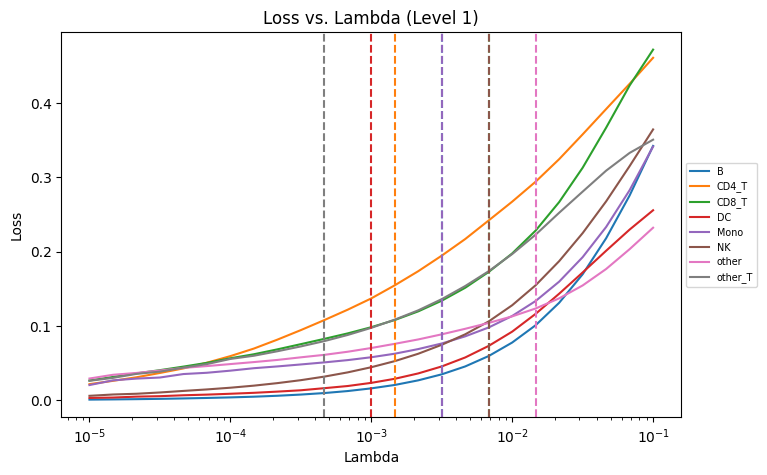

In [7]:
# Plot the loss history against lambda
colors = plt.cm.tab10.colors

fig, ax = plt.subplots(figsize=(8, 5))

# plot the y-axis values for each key in loss_dict
for i, key in enumerate(loss_dict):
    ax.plot(lambda_range, loss_dict[key], label=key, color=colors[i])

# add vertical dotted lines at the values in opt_lambda_dict
for i, key in enumerate(opt_lmbd_dict):
    ax.axvline(x=opt_lmbd_dict[key], linestyle='--', color=colors[i])

# set the x-axis label
ax.set_xlabel('Lambda')
ax.set_xscale('log')

# set the y-axis label
ax.set_ylabel('Loss')

# add a legend
# ax.legend(loc='upper left')  # , fontsize='x-small'
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')
plt.title('Loss vs. Lambda (Level 1)')

# show the plot
plt.show()